## Observations and Insights 

In [256]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)



In [257]:
#count all the rows original in data
rowsn=study_results.count
print(rowsn)

<bound method DataFrame.count of      Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites
0        b128          0           45.000000                 0
1        f932          0           45.000000                 0
2        g107          0           45.000000                 0
3        a457          0           45.000000                 0
4        c819          0           45.000000                 0
...       ...        ...                 ...               ...
1888     r944         45           41.581521                 2
1889     u364         45           31.023923                 3
1890     p438         45           61.433892                 1
1891     x773         45           58.634971                 4
1892     b879         45           72.555239                 2

[1893 rows x 4 columns]>


In [258]:
# # Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
# Optional: Get all the data for the duplicate mouse ID. 
duplicateRowsDF = study_results[study_results.duplicated(['Mouse ID','Timepoint'])]
print("Duplicate Rows :", duplicateRowsDF, sep='\n')

Duplicate Rows :
     Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites
137      g989          0           45.000000                 0
360      g989          5           47.570392                 0
681      g989         10           49.880528                 0
869      g989         15           53.442020                 0
1111     g989         20           54.657650                 1


In [259]:
#cleaning repeated rows in the data
study_results.drop_duplicates(subset=['Mouse ID', 'Timepoint'])

# 5 rows were duplicates in both Mouse ID and Timepoint and were deleted from memory

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.000000,0
1,f932,0,45.000000,0
2,g107,0,45.000000,0
3,a457,0,45.000000,0
4,c819,0,45.000000,0
...,...,...,...,...
1888,r944,45,41.581521,2
1889,u364,45,31.023923,3
1890,p438,45,61.433892,1
1891,x773,45,58.634971,4


In [260]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

study_resultsnew=(study_results.drop_duplicates(subset=['Mouse ID', 'Timepoint']))

In [261]:
# Checking the number of mice in the clean DataFrame.
count=study_resultsnew['Mouse ID'].count
print(count)

<bound method Series.count of 0       b128
1       f932
2       g107
3       a457
4       c819
        ... 
1888    r944
1889    u364
1890    p438
1891    x773
1892    b879
Name: Mouse ID, Length: 1888, dtype: object>


In [262]:
# Combine the data into a single dataset
MouseData=mouse_metadata.merge(study_resultsnew, how='inner', on='Mouse ID', left_index=False, sort=True)


In [263]:
# Display the data table for preview
MouseData

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,0,45.000000,0
1,a203,Infubinol,Female,20,23,5,48.508468,0
2,a203,Infubinol,Female,20,23,10,51.852437,1
3,a203,Infubinol,Female,20,23,15,52.777870,1
4,a203,Infubinol,Female,20,23,20,55.173336,1
...,...,...,...,...,...,...,...,...
1883,z969,Naftisol,Male,9,30,25,63.145652,2
1884,z969,Naftisol,Male,9,30,30,65.841013,3
1885,z969,Naftisol,Male,9,30,35,69.176246,4
1886,z969,Naftisol,Male,9,30,40,70.314904,4


## Summary Statistics

In [264]:
# drop the Na values and check that all indexes are correct to have an accurate count
TumorVolume_df=MouseData.dropna(subset=['Tumor Volume (mm3)'])
TumorVolume_list=TumorVolume_df['Tumor Volume (mm3)']
TumorVolume_list.reset_index(drop=True,inplace=True)


In [265]:
#calculate mean
TVmean=TumorVolume_list.mean()
TVmean

50.449276454131414

In [266]:
#calculate median
TVmedian=TumorVolume_list.median()
TVmedian

48.951421075

In [267]:
#calculate the sum and count first
TVsum=TumorVolume_list.sum()
TVsum
TVcount=TumorVolume_list.count()
TVcount, TVsum, TVsum/TVcount

(1888, 95248.2339454, 50.44927645413136)

In [268]:
#calculating variance with old fashion method to secure that all elements are fine
Myelement=0
sumMyelementvariance=0
for i in range(TVcount-1):
    Myelementvariance=(float(TumorVolume_list[i])-TVmean)**2
    sumMyelementvariance= sumMyelementvariance + Myelementvariance
    
TVvariance=sumMyelementvariance/TVcount
TVvariance

78.95879831248787

In [269]:
#calculates standard deviation using scipy
TVstd=st.stats.tstd(TumorVolume_list, axis=0, ddof=1)

In [270]:
#calculates sem using scipy
TVsem=st.stats.sem(TumorVolume_list,axis=0, ddof=1)

In [271]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume 

TotalTumorVolumestats=pd.DataFrame.from_dict({'index':'Tumor Volume','Count':[TVcount],'Mean':[TVmean],'Median':[TVmedian],'Variance':[TVvariance],
                                    'Stand deviation':TVstd,'SEM':[TVsem]})
TotalTumorVolumestats.style.hide_index()


index,Count,Mean,Median,Variance,Stand deviation,SEM
Tumor Volume,1888,50.449276,48.951421,78.958798,8.904565,0.204933


In [272]:
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

In [273]:
TumorVolume_df
TumorVolume_df=MouseData.dropna(subset=['Tumor Volume (mm3)'])
TumorVolume_df=MouseData.dropna(subset=['Drug Regimen'])
TumorVolume_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,0,45.000000,0
1,a203,Infubinol,Female,20,23,5,48.508468,0
2,a203,Infubinol,Female,20,23,10,51.852437,1
3,a203,Infubinol,Female,20,23,15,52.777870,1
4,a203,Infubinol,Female,20,23,20,55.173336,1
...,...,...,...,...,...,...,...,...
1883,z969,Naftisol,Male,9,30,25,63.145652,2
1884,z969,Naftisol,Male,9,30,30,65.841013,3
1885,z969,Naftisol,Male,9,30,35,69.176246,4
1886,z969,Naftisol,Male,9,30,40,70.314904,4


In [274]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

TumorRegimeVolume_df=TumorVolume_df[['Drug Regimen','Tumor Volume (mm3)']]
TumorRegimeVolume_df

,Drug Regimen,Tumor Volume (mm3)
0,Infubinol,45.000000
1,Infubinol,48.508468
2,Infubinol,51.852437
3,Infubinol,52.777870
4,Infubinol,55.173336
...,...,...
1883,Naftisol,63.145652
1884,Naftisol,65.841013
1885,Naftisol,69.176246
1886,Naftisol,70.314904


In [275]:
# Using the aggregation method, produce the same summary statistics in a single line

In [276]:
TVstatsRegime=pd.DataFrame(TumorRegimeVolume_df.groupby(['Drug Regimen']).agg(['count','mean','median','var','std','sem'])).reset_index()
TVstatsRegime.style.hide_index()

## Bar and Pie Charts

In [277]:
#let's check the column names with enumerate
col_mapping = [f"{c[0]}:{c[1]}" for c in enumerate(TVstatsRegime.columns)]
col_mapping

["0:('Drug Regimen', '')",
 "1:('Tumor Volume (mm3)', 'count')",
 "2:('Tumor Volume (mm3)', 'mean')",
 "3:('Tumor Volume (mm3)', 'median')",
 "4:('Tumor Volume (mm3)', 'var')",
 "5:('Tumor Volume (mm3)', 'std')",
 "6:('Tumor Volume (mm3)', 'sem')"]

In [278]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.

TVstatsRegime=TVstatsRegime.loc[:,[('Drug Regimen', ''),('Tumor Volume (mm3)', 'count')]]
TVstatsRegime

,Drug Regimen,Tumor Volume (mm3)
,,count
0,Capomulin,230
1,Ceftamin,178
2,Infubinol,178
3,Ketapril,188
4,Naftisol,186
5,Placebo,181
6,Propriva,156
7,Ramicane,228
8,Stelasyn,181


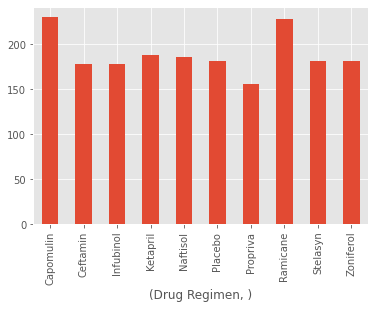

In [279]:
#Tumor Volume measurements per Regimen barplot
TVstatsRegime.plot(kind='bar', x=('Drug Regimen', ''), y=('Tumor Volume (mm3)', 'count'), rot=90, legend=False)

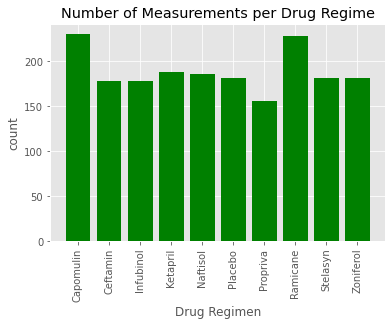

In [280]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
%matplotlib inline
plt.style.use('ggplot')

x = TVstatsRegime[('Drug Regimen', '')]
count = TVstatsRegime[('Tumor Volume (mm3)', 'count')]

plt.bar(x, count, color='green')
plt.xlabel("Drug Regimen")
plt.ylabel("count")
plt.title("Number of Measurements per Drug Regime")

plt.xticks(x, rotation=90)

plt.show()

In [281]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
MouseData


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,0,45.000000,0
1,a203,Infubinol,Female,20,23,5,48.508468,0
2,a203,Infubinol,Female,20,23,10,51.852437,1
3,a203,Infubinol,Female,20,23,15,52.777870,1
4,a203,Infubinol,Female,20,23,20,55.173336,1
...,...,...,...,...,...,...,...,...
1883,z969,Naftisol,Male,9,30,25,63.145652,2
1884,z969,Naftisol,Male,9,30,30,65.841013,3
1885,z969,Naftisol,Male,9,30,35,69.176246,4
1886,z969,Naftisol,Male,9,30,40,70.314904,4


In [282]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
Sex_df=MouseData.groupby(['Sex']).count()
Sex_df['Mouse ID']

Sex
Female    930
Male      958
Name: Mouse ID, dtype: int64

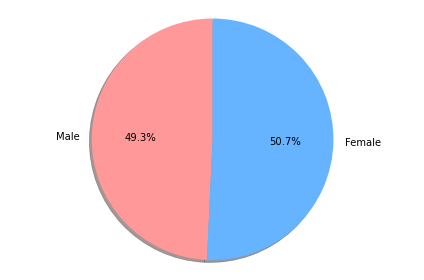

In [283]:
labels = ['Male', 'Female']
sizes = [Sex_df['Mouse ID'][0],Sex_df['Mouse ID'][1]]

#add colors
colors = ['#ff9999','#66b3ff']
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=90)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')
plt.tight_layout()
plt.show()

## Quartiles, Outliers and Boxplots

In [284]:
Regimen_df=MouseData.set_index('Drug Regimen')
Regimen_df

,Mouse ID,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Drug Regimen,,,,,,,
Infubinol,a203,Female,20,23,0,45.000000,0
Infubinol,a203,Female,20,23,5,48.508468,0
Infubinol,a203,Female,20,23,10,51.852437,1
Infubinol,a203,Female,20,23,15,52.777870,1
Infubinol,a203,Female,20,23,20,55.173336,1
...,...,...,...,...,...,...,...
Naftisol,z969,Male,9,30,25,63.145652,2
Naftisol,z969,Male,9,30,30,65.841013,3
Naftisol,z969,Male,9,30,35,69.176246,4


In [285]:
#Regimen_df=MouseData[['Capomulin']]
Capomulin_df=Regimen_df.loc[['Capomulin']].reset_index()
Ramicane_df=Regimen_df.loc[['Ramicane']].reset_index()
Infubinol_df=Regimen_df.loc[['Infubinol']].reset_index() 
Ceftamin_df=Regimen_df.loc[['Ceftamin']].reset_index()

Capomulin_df

,Drug Regimen,Mouse ID,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,Capomulin,b128,Female,9,22,0,45.000000,0
1,Capomulin,b128,Female,9,22,5,45.651331,0
2,Capomulin,b128,Female,9,22,10,43.270852,0
3,Capomulin,b128,Female,9,22,15,43.784893,0
4,Capomulin,b128,Female,9,22,20,42.731552,0
...,...,...,...,...,...,...,...,...
225,Capomulin,y793,Male,17,17,25,38.992734,2
226,Capomulin,y793,Male,17,17,30,35.726023,2
227,Capomulin,y793,Male,17,17,35,36.327870,2
228,Capomulin,y793,Male,17,17,40,31.475411,2


In [286]:
# Start by getting the last (greatest) timepoint for each mouse

c_to_keep=['Drug Regimen','Mouse ID','Tumor Volume (mm3)']
Capomulin=Capomulin_df.drop_duplicates(subset=['Mouse ID'], keep='last', inplace=False, ignore_index=False).reset_index()
Capomulin

,index,Drug Regimen,Mouse ID,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,9,Capomulin,b128,Female,9,22,45,38.982878,2
1,19,Capomulin,b742,Male,7,21,45,38.939633,0
2,24,Capomulin,f966,Male,16,17,20,30.485985,0
3,34,Capomulin,g288,Male,3,19,45,37.074024,1
4,44,Capomulin,g316,Female,22,22,45,40.159220,2
5,54,Capomulin,i557,Female,1,24,45,47.685963,1
6,64,Capomulin,i738,Female,23,20,45,37.311846,2
7,74,Capomulin,j119,Female,7,23,45,38.125164,1
8,82,Capomulin,j246,Female,21,21,35,38.753265,1
9,92,Capomulin,l509,Male,17,21,45,41.483008,3


In [287]:
#getting last timepoint for the other treatments
Ramicane=Ramicane_df.drop_duplicates(subset=['Mouse ID'], keep='last', inplace=False, ignore_index=False)
Infubinol=Infubinol_df.drop_duplicates(subset=['Mouse ID'], keep='last', inplace=False, ignore_index=False)
Ceftamin=Ceftamin_df.drop_duplicates(subset=['Mouse ID'], keep='last', inplace=False, ignore_index=False)

In [288]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin
Capomulin=Capomulin.loc[:,c_to_keep]
Ramicane=Ramicane.loc[:,c_to_keep]
Infubinol=Infubinol.loc[:,c_to_keep]
Ceftamin=Ceftamin.loc[:,c_to_keep]
Capomulin

,Drug Regimen,Mouse ID,Tumor Volume (mm3)
0,Capomulin,b128,38.982878
1,Capomulin,b742,38.939633
2,Capomulin,f966,30.485985
3,Capomulin,g288,37.074024
4,Capomulin,g316,40.159220
5,Capomulin,i557,47.685963
6,Capomulin,i738,37.311846
7,Capomulin,j119,38.125164
8,Capomulin,j246,38.753265
9,Capomulin,l509,41.483008


In [289]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
Selected = [Capomulin, Ramicane, Infubinol,Ceftamin]
TumorVolume_Selected = pd.concat(Selected)


In [290]:
TumorVolume_Selected.set_index('Mouse ID')

,Drug Regimen,Tumor Volume (mm3)
Mouse ID,,
b128,Capomulin,38.982878
b742,Capomulin,38.939633
f966,Capomulin,30.485985
g288,Capomulin,37.074024
g316,Capomulin,40.159220
...,...,...
x226,Ceftamin,45.000000
x581,Ceftamin,64.634949
x822,Ceftamin,61.386660


In [291]:
# Put treatments into a list for for loop (and later for plot labels)
TumorVolume_Selected.reset_index(drop=True)
Treatments = ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']
# df=TumorVolume_Selected
# df

In [292]:
TumorVolume_Selected

,Drug Regimen,Mouse ID,Tumor Volume (mm3)
0,Capomulin,b128,38.982878
1,Capomulin,b742,38.939633
2,Capomulin,f966,30.485985
3,Capomulin,g288,37.074024
4,Capomulin,g316,40.159220
...,...,...,...
137,Ceftamin,x226,45.000000
147,Ceftamin,x581,64.634949
157,Ceftamin,x822,61.386660
167,Ceftamin,y769,68.594745


In [319]:
# Create empty list to fill with tumor vol data (for plotting)
TumorVolume=[]
CapomulinTV=[]
RamicaneTV=[]
InfubinolTV=[]
CeftalinTV=[]

[]

In [311]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

In [312]:
start=0
end=0
    
for i in range(4):
    Treatment=Treatments[i]
    
    start=i*25
    end=(i+1)*25
    b=df.iloc[start:end,2]
    print(f'data range {start}-{end}')
    
    for j in range(0,25):
        a=b.iloc[j]
        lower=b.mean()-1.5*(b.quantile(0.75)-b.quantile(0.25))
        upper=b.mean()+1.5*(b.quantile(0.75)-b.quantile(0.25))
        #print(j)
        if a<lower or a>upper:
            print(f'POSSIBLE outlier in {Treatment} row {j+start},  lowerQ {lower} upperQ {upper} TumorVolume = {a} ')
            
     # Locate the rows which contain mice on each drug and get the tumor volumes           

data range 0-25
POSSIBLE outlier in Capomulin row 16,  lowerQ 24.994772529199995 upperQ 48.34036290920001 TumorVolume = 23.34359787 
data range 25-50
POSSIBLE outlier in Ramicane row 38,  lowerQ 22.5435853484 upperQ 49.839195508399996 TumorVolume = 22.05012627 
data range 50-75
POSSIBLE outlier in Infubinol row 55,  lowerQ 40.96254304519999 upperQ 75.3939485252 TumorVolume = 36.321345799999996 
data range 75-100


In [325]:
# add subset 
 
TumorVolume =TumorVolume_Selected['Tumor Volume (mm3)'].tolist() 
CapomulinTV=TumorVolume[0:24:]
RamicaneTV=TumorVolume[25:49:]
InfubinolTV=TumorVolume[50:74:]
CeftaminTV=TumorVolume[75:99:]

In [327]:
TumorVolumeTreatments=[CapomulinTV,RamicaneTV,InfubinolTV,CeftaminTV]

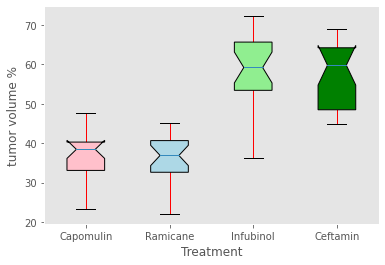

In [328]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
import numpy as np

fig, ax = plt.subplots()
bplot=bp = ax.boxplot([CapomulinTV,RamicaneTV,InfubinolTV,CeftaminTV], 1, 
                      sym='k+', labels=["Capomulin","Ramicane","Infubinol", "Ceftamin"], 
                      patch_artist=True)

ax.set_xlabel('Treatment')
ax.set_ylabel('tumor volume %')
plt.setp(bp['boxes'], color='black')
plt.setp(bp['whiskers'], color='r', linestyle='-')
plt.setp(bp['fliers'],  color='red', marker='o' ,markersize=26.0)
ax.yaxis.grid(False)
ax.xaxis.grid(False)

# fill with colors
colors = ['pink', 'lightblue', 'lightgreen',"green"]
for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)

plt.show()
#

## Line and Scatter Plots

In [338]:
# Generate a line plot of tumor volume vs. time point for a mouse treated 
#with Capomulin

Capomulin_df


,Drug Regimen,Mouse ID,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,Capomulin,b128,Female,9,22,0,45.000000,0
1,Capomulin,b128,Female,9,22,5,45.651331,0
2,Capomulin,b128,Female,9,22,10,43.270852,0
3,Capomulin,b128,Female,9,22,15,43.784893,0
4,Capomulin,b128,Female,9,22,20,42.731552,0
...,...,...,...,...,...,...,...,...
225,Capomulin,y793,Male,17,17,25,38.992734,2
226,Capomulin,y793,Male,17,17,30,35.726023,2
227,Capomulin,y793,Male,17,17,35,36.327870,2
228,Capomulin,y793,Male,17,17,40,31.475411,2


In [376]:
LineMouse=Capomulin_df[['Mouse ID','Timepoint','Tumor Volume (mm3)']].dropna()
CountMice=pd.DataFrame(LineMouse.groupby(["Mouse ID"][0]).count())
CountMice

,Timepoint,Tumor Volume (mm3)
Mouse ID,,
b128,10,10
b742,10,10
f966,5,5
g288,10,10
g316,10,10
i557,10,10
i738,10,10
j119,10,10
j246,8,8


In [377]:
OneMouse=LineMouse.loc[LineMouse['Mouse ID']=='i557']
x1=OneMouse['Timepoint'].tolist()
y1=OneMouse['Tumor Volume (mm3)'].tolist()
OneMouse=LineMouse.loc[LineMouse['Mouse ID']=='r944']
x2=OneMouse['Timepoint'].tolist()
y2=OneMouse['Timepoint'].tolist()

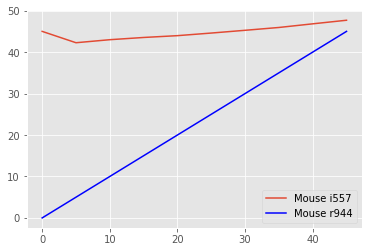

In [383]:
#Line plot
fig, ax = plt.subplots()

# Using set_dashes() to modify dashing of an existing line
line1=ax.plot(x1, y1, label='Mouse i557',)
line2=ax.plot(x2, y2, label='Mouse r944', color='blue')


ax.legend()
plt.show()

In [425]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
import statistics
MouseWeight=Capomulin_df[["Tumor Volume (mm3)","Weight (g)"]]
x3=MouseWeight['Weight (g)'].tolist()
y3=MouseWeight['Tumor Volume (mm3)'].tolist()
meanx3=mean(x3)
stdx3=statistics.pstdev(x3)
meany3=mean(x3)
stdy3=statistics.pstdev(y3)

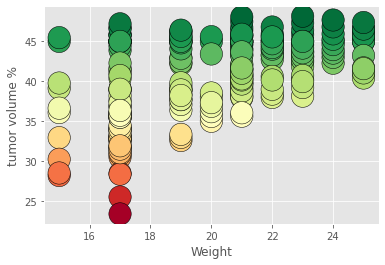

In [426]:
import matplotlib.colors as mcolors
# Plot...

fig, ax = plt.subplots()
plt.scatter(x3, y3, c=y3, cmap="RdYlGn", s=500, edgecolors="black")

ax.set_xlabel('Weight')
ax.set_ylabel('tumor volume %')



## Correlation and Regression

In [429]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
import scipy
z=Capomulin_df[['Age_months']]
nCapomulin=Capomulin.count()

In [430]:
scipy.stats.pearsonr(x3,y3)


(0.525699555207717, 9.605446629502006e-18)

In [438]:
# Linear - Line of best fit
m,b = np.polyfit(x3,y3,1)
print(m,b)

0.9609669432428354 21.489827213299556


In [494]:
x4=[float(i) for i in x3]
type(x4[3])
y4=[]
for i in x4:  
    ti = 21.5+0.96*i
    y4.append(ti)





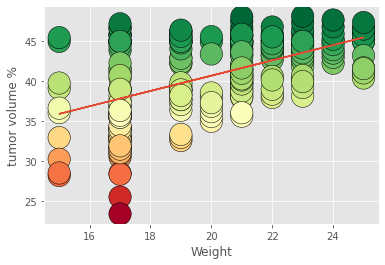

In [497]:
fig, ax = plt.subplots()
plt.scatter(x4, y3, c=y3, cmap="RdYlGn", s=500, edgecolors="black")

ax.set_xlabel('Weight')
ax.set_ylabel('tumor volume %')

plt.plot(x4, y4,'-')

# text='0.96*x+21.48, r=0.96'
# text(0,1, 'matplotlib', horizontalalignment='center',
# verticalalignment='center', transform=ax.transAxes)

plt.show()